## Examples of using Transformation class

Author: Dimitris Giovanis, Michael Shields

Date: 12/4/2018

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Correlate, Decorrelate, Nataf, InvNataf
import numpy as np
import matplotlib.pyplot as plt

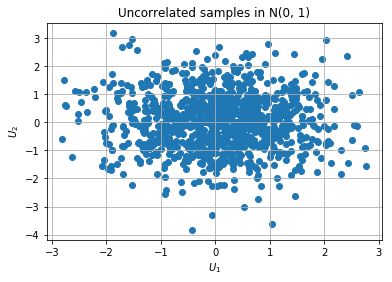

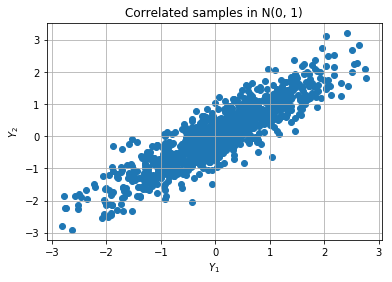

Caution: The samples provided must be realizations of uncorrelated standard normal random variables.


In [11]:
# Example 1: 
#In this example, the class 'Correlate' is employed to correlate standard normal samples 
#generated with the UQpy MCS class. 

# Generate uncorrelated standard normal samples using MCS class
x = MCS(dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

# Plot the samples
plt.figure()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(x.samples[:, 0], x.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

# Correlate the samples according to the following correlation matrix
Rho = np.array([[1.0, 0.9], [0.9, 1.0]])
y = Correlate(x, corr_norm=Rho)

plt.figure()
plt.title('Correlated samples in N(0, 1)')
plt.scatter(y.samples[:, 0], y.samples[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

# When samples are provided as an array
x_a = x.samples
y0 = Correlate(x_a, corr_norm=Rho, dimension=2)

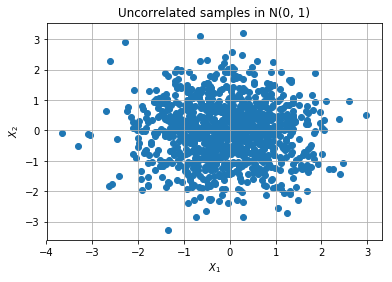

In [5]:
# Example 2: 
#In this example, the class 'Decorrelate' is employed to decorrelate the correlated standard normal samples 
#generated in the previous example. 

# Decorrelate standard normal samples using MCS class
q = Decorrelate(y, corr_norm=Rho)


# Plot the uncorrelated samples
plt.figure()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(q.samples[:, 0], q.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()


UQpy: Computing correlation distortion...
UQpy: Done.
Transformed Correlation matrix:
[[ 1.          0.31649732]
 [ 0.31649732  1.        ]]


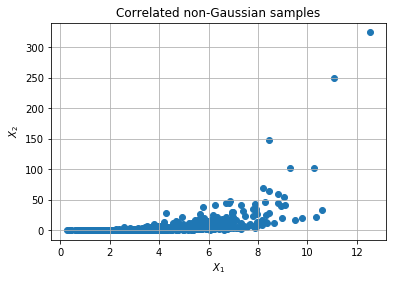

In [7]:
# Example 3: 
#In this example, the class 'InvNataf' is employed to transform the correlated standard normal samples 
#generated in example 1 to  correlated non-Gaussian samples.

# Transform correlated standard normal samples to non-Gaussian samples using the Inverse Nataf transformation.
x_ng = InvNataf(input_samples=y, corr_norm=Rho, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Transformed Correlation matrix:')
print(x_ng.corr)

plt.figure()
plt.title('Correlated non-Gaussian samples')
plt.scatter(x_ng.samples[:, 0], x_ng.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.31568159453964389]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.14268538246912976]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.042165228739204939]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.010543988432141937]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.0027558823676535299]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.00071214991018266798]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Curr

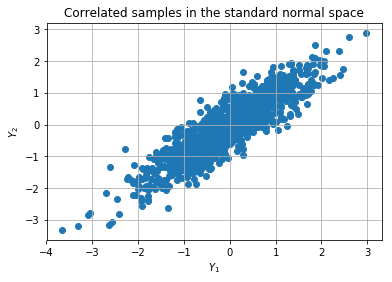

In [9]:
# Example 4:
# In this example, the class 'Nataf' is employed to transform the correlated non-Gaussian samples of example 3 
#back to standard normal samples.

x_g = Nataf(input_samples=x_ng, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Correlation matrix in the standard normal space')
print(x_g.corr_norm)

plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(x_g.samples[:, 0], x_g.samples[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

UQpy: Computing correlation distortion...
UQpy: Done.
Transformed Correlation matrix:
[[ 1.          0.31649732]
 [ 0.31649732  1.        ]]


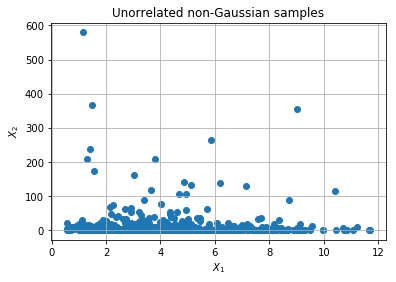

In [12]:
# Example 5:
# Similar to example 3 but with uncorrelated samples.

# Transform correlated standard normal samples to non-Gaussian samples using the Inverse Nataf transformation.
x_ng = InvNataf(input_samples=x, corr_norm=Rho, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Transformed Correlation matrix:')
print(x_ng.corr)

plt.figure()
plt.title('Unorrelated non-Gaussian samples')
plt.scatter(x_ng.samples[:, 0], x_ng.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.31568159453964389]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.14268538246912976]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.042165228739204939]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.010543988432141937]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.0027558823676535299]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.00071214991018266798]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Curr

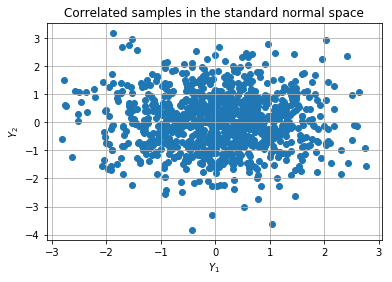

In [13]:
# Example 6:
# Similar to example 4 but with uncorrelated samples.

x_g = Nataf(input_samples=x_ng, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Correlation matrix in the standard normal space')
print(x_g.corr_norm)

plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(x_g.samples[:, 0], x_g.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.3868990608879199]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 1.3868980914480282]
UQpy: ITAM Done.
0
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.3586834431005965]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 1.3586618463131934]
UQpy: ITAM Done.
1
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.3304711840346348]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteratio

UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.79563714994746149]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.79415885364082017]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.79377407104501052]
UQpy: ITAM Done.
21
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.76759740246690267]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.76594855759389024]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.76553293604136308]
UQpy: ITAM Done.
22
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...


UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.39842778515427119]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.3981402042410398]
UQpy: ITAM Done.
35
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.37781702612669249]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.37123919183551252]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.3701914437645773]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.36989110366190586]
UQpy: ITAM Done.
36
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQ

UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.089681852862935799]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.087851210512904357]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.087404017435053355]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.087246708105535434]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.087180625903564943]
UQpy: ITAM Done.
46
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.07914301401554244]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.05909397

UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.077618967952854737]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.34176990900226883]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.064730204828289714]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.17683964905785871]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.053911949764911843]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.11034857776090216]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.044656677603921835]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration nu

UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.50119282987564107]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.091956268091749852]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.47555468825448638]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.091107770903663121]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.45707702727625921]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.09044886753753914]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.44341102969144502]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iterati

UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.091366610167632145]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.36524880628091932]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.1066506073927216]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.6389810959259552]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.11865264899911086]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 1.0929426849535466]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.12658976892657911]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration n

UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.099906234244441186]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.075186869600893672]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 30]
['UQpy: Current error, ', 0.20973331776436943]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.10641181090288811]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.50580076735853219]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 33]
['UQpy: Current error, ', 0.13579753030148004]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 34]
['UQpy: Current error, ', 0.098381374270364766]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iterat

UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.12263821956419385]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 38]
['UQpy: Current error, ', 0.69137857311030626]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 39]
['UQpy: Current error, ', 0.16610039255684877]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.065072361804575415]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.064279427674109532]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 42]
['UQpy: Current error, ', 0.15650680969211134]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.10709158324691734]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iterati

UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.090561951956914785]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 47]
['UQpy: Current error, ', 0.087743770246342043]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 48]
['UQpy: Current error, ', 0.27385471447483395]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.15030619524738456]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.13113335317910232]
UQpy: ITAM Done.
58
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.22652115969850775]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.001342

UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.04863347264359396]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.11001515946170244]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.11589978985409927]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.46143834193202954]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.21391039288636016]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.061063453102034551]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.077519065871570328]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration num

UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.1966391509075868]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.17073773970663408]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.1524973259050916]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.14996567895495375]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.82641981742916848]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.26293201478278877]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.010105204815597423]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration 

UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 1.014389966532776]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.29435523363523619]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.045411687582755336]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.1053217025825649]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.12765121175044927]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.53142962583020759]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.26125958739910449]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration n

UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.16535866006051356]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.17703494187831872]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 33]
['UQpy: Current error, ', 0.16498366075226475]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 34]
['UQpy: Current error, ', 0.17681374913432799]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 35]
['UQpy: Current error, ', 0.16526875244779515]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 36]
['UQpy: Current error, ', 0.17698195282989262]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.16505197071653718]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration

UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.16224579221694774]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.18465785138519403]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 42]
['UQpy: Current error, ', 0.16272328653391321]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.18496609184309526]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.16234344460035735]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.18472095604596706]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.16264554332191944]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration

UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.16026420299650507]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.19238809990140737]
UQpy: ITAM Done.
65
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.38370357568904295]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.10897361429641231]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.37592075868477348]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.30228806677693026]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.02532516561

UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.1723887413761602]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.21872048008824269]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.13739705845871497]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.19025278795772282]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.16847974742835914]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.21578907671048878]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.14066666604443909]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration nu

UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.21395676780870382]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.14506216787778123]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.20433537739068044]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.15517729798418692]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.21321254644390136]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.14584994318524483]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.20504339823937678]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration

UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.09716101565802196]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.16005792066153535]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.72054269048080988]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.42466613693509969]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 30]
['UQpy: Current error, ', 0.11643722941566864]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.41493931372495829]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.36076272459818892]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration

UQpy: Done.
['UQpy: ITAM iteration number ', 35]
['UQpy: Current error, ', 0.14010324095276505]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 36]
['UQpy: Current error, ', 0.21338898483899649]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.14653337689306389]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 38]
['UQpy: Current error, ', 0.21980235477371471]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 39]
['UQpy: Current error, ', 0.14024766246923481]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.21353527633176542]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.14639059406100244]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration

UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.18499952520481669]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.17163034702888944]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.25076478967445104]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 47]
['UQpy: Current error, ', 0.10932283778246689]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 48]
['UQpy: Current error, ', 0.18471860963257625]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.17188597397785046]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.25099746301427645]
UQpy: ITAM Done.
71
UQpy: Initializing Iterative Translation Approximation M

UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.16283280975865805]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.25671025263038416]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.10116255187237684]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.18337102960893564]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.16637358277636791]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.26032271526354284]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.097808501999501751]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration numbe

UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.26042103647273485]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.095323588045334279]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.17922300219145576]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.16537448703489174]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.26615378209755741]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.090144501603610247]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.17158818755295915]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iterati

UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.21002330891122648]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.12989692543509243]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.23599057022038769]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.10865086073018539]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.20668158445637974]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.13259439447583421]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.23951806366285591]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number

UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.12259746648341349]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.23091062387554406]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.10757821546200234]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.20922185648758226]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.1248300764755227]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.23401471148734551]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.10508191442108115]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration 

UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.21072345340931439]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.11741685237773047]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.22793867238445387]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.10405956705570928]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.20776955386235246]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.119689648178013]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.23125635388627214]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration n

UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.19326224513851095]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.11625244668653532]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.23447496573616697]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.085810423862222554]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.18424057442963596]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.1227923413194295]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.24445942072919838]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration numbe

UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.14316848846380453]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.27882001755413077]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.045404808527384856]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.10792517608754233]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.37948121599293083]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.5059915228470685]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.14671675820931623]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration

UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.054827846999860236]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.12939583805731059]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.48615588672778248]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.57868997778868425]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.2185960870558008]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.082162593320150745]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.1831918482253026]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration

UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.043640705671552274]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.10681882015329873]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 33]
['UQpy: Current error, ', 0.37678787986935525]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 34]
['UQpy: Current error, ', 0.52711236928089933]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 35]
['UQpy: Current error, ', 0.17021404349371497]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 36]
['UQpy: Current error, ', 0.10701895833424437]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.23051558264812666]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteratio

UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.21322786467342458]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.06874308903471206]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 42]
['UQpy: Current error, ', 0.1617990307525182]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.10326229709728606]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.22726657331288103]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.059122404163407465]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.1418748211253531]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration 

UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.19912549381001995]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.068997988496548465]
UQpy: ITAM Done.
85
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.57491673460420589]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.22191550610420011]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.044366658915203139]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.1122525180312498]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.1146936476

UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.048654643897627449]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.12339228792158208]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.097032659178234545]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.22472914974366995]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.032825782764301321]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.085881961057486397]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.29146378041841853]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iterati

UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.10016974409304895]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.10007859664326749]
UQpy: ITAM Done.
88
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.53269956030317123]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.20203628149931124]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.02680247879010943]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.07233855735089495]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.24013083699

UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.069934398006893481]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.17592391156175863]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.031962725483647619]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.08620558923683222]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.08514146351434311]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.20849580631619072]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.012057909965343155]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteratio

UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.026955188857573569]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.08219349341306724]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.20445765676111566]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.0035384085231255137]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.010160183797993067]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.029962381784436495]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.081839817339210127]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM ite

UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.17593731527101308]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.0092088616055543016]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.02636387980542193]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.080828182897191722]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 30]
['UQpy: Current error, ', 0.20359013509505233]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.0071957426727350116]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.021252506084077506]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM ite

UQpy: Done.
['UQpy: ITAM iteration number ', 35]
['UQpy: Current error, ', 0.034522765931050192]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 36]
['UQpy: Current error, ', 0.10823480299568373]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.26315901069752812]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 38]
['UQpy: Current error, ', 0.054301232179978759]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 39]
['UQpy: Current error, ', 0.17708003576103271]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.38690778122314085]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.1319234824052615]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteratio

UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.051158056948179445]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.13809608047318081]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.0070851290193286462]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 47]
['UQpy: Current error, ', 0.020672856561563278]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 48]
['UQpy: Current error, ', 0.063502069594401842]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.16785643663229879]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.0098162250774223112]
UQpy: ITAM Done.
94
UQpy: Initializing Iterative Translation Approxim

UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.10086021398596567]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.0024095789180151135]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.0071900178335699777]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.021824155100891834]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.062951420509408898]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.022805338565748186]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.065670522561791705]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteratio

UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.010018256889281943]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.030757027611815362]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.088024386503445087]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.0037521249696628673]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.011392991079329695]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.033695967319008681]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.024916241206093124]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM i

UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.011683202405572553]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.0088185648008858621]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.026546300884392745]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.001257648169744157]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.0038342751981091236]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.011791180906171414]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.035319060299339525]
UQpy: Computing correlation distortion...
UQpy: Done.
['UQpy: ITAM 

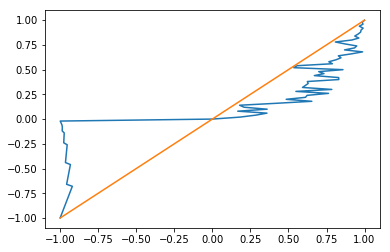

In [14]:
# Example 7:
# Performs the Iterative Translation Approximation Method (ITAM) to estimate the underlying Gaussian 
# correlation from known values of the correlation for lognormal random variables.
# For a range of correlation values from -0.999 to 0.999, estimate the underlying Gaussian correlation 
#that most closely approximates yields the corresponding correlation for Lognormal(0,1) random variables.

w3 = np.zeros(101)
rho = np.linspace(-0.999, 0.999, 101)
for i in range(101):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Nataf(corr=Rho1, dist_name=['Lognormal', 'Lognormal'], dist_params=[[2, 0.0, 4], [2, 0.0, 4]], itam_error2=0.001)
    w3[i] = ww.corr_norm[0, 1]
    print(i)

plt.plot(w3, rho)
plt.plot(rho, rho)
plt.show()

UQpy: Computing correlation distortion...
UQpy: Done.
0
UQpy: Computing correlation distortion...
UQpy: Done.
1
UQpy: Computing correlation distortion...
UQpy: Done.
2
UQpy: Computing correlation distortion...
UQpy: Done.
3
UQpy: Computing correlation distortion...
UQpy: Done.
4
UQpy: Computing correlation distortion...
UQpy: Done.
5
UQpy: Computing correlation distortion...
UQpy: Done.
6
UQpy: Computing correlation distortion...
UQpy: Done.
7
UQpy: Computing correlation distortion...
UQpy: Done.
8
UQpy: Computing correlation distortion...
UQpy: Done.
9
UQpy: Computing correlation distortion...
UQpy: Done.
10
UQpy: Computing correlation distortion...
UQpy: Done.
11
UQpy: Computing correlation distortion...
UQpy: Done.
12
UQpy: Computing correlation distortion...
UQpy: Done.
13
UQpy: Computing correlation distortion...
UQpy: Done.
14
UQpy: Computing correlation distortion...
UQpy: Done.
15
UQpy: Computing correlation distortion...
UQpy: Done.
16
UQpy: Computing correlation distortion...

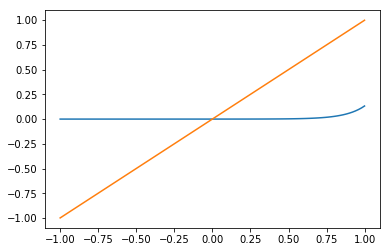

In [15]:
# Example 8:
# Calculate correlation distortion for the transformation of two random variables from normal to lognormal.
# Compute the correlation distortion at various values of Gaussian correlation.

w4 = np.zeros(101)
rho = np.linspace(-0.999, 0.999, 101)
for i in range(101):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = InvNataf(corr_norm=Rho1, dist_name=['Lognormal', 'Lognormal'], dist_params=[[2, 0.0, 1], [4, 0.0, 1]], dimension=2)
    w4[i] = ww.corr[0, 1]
    print(i)

plt.plot(rho, w4)
plt.plot(rho, rho)
plt.show()